### **Database with Python**

In [10]:
# SQLite database is inbuilt in Python.
# And it is the light weight version of the MySQL.

In [11]:
# importing the required modules
import sqlite3

In [12]:
# creating a database
# use the database if it already exists or create a new one
try:
    connection = sqlite3.connect("myemp.db")
    print ("Connected with the database successfully...")
except:
    print ("There are some connectivity error...")
    print ("Database could not get connected...")

Connected with the database successfully...


In [ ]:
SQLite manager online link:
https://extendsclass.com/sqlite-browser.html

Data files are mainly of following types:
* csv (Comma Separated Values)
* tsv (Tab Separated Values)
* XML (Extensible Markup Language)
* JSON (Java Script Object Notation)

In [6]:
# create employee table as employee(emp_id, emp_name, emp_city, emp_salary)
sqlStr = '''
            CREATE TABLE employee (
                emp_id INTEGER PRIMARY KEY,
                emp_name TEXT,
                city TEXT,
                salary REAL
            );
         '''
try:   # create the table if it does not pre-exist
    connection.execute(sqlStr)
    print ("Database table has been created successfully")
except:
    print ("Error !!! Table could not be created...")

Database table has been created successfully


In [15]:
# inserting records from the csv file and writing it to the database employee table
import csv   # importing module to read the csv file content
# read the csv file content and string them into the table
# with open("C:\\Users\Arnab\AEC Python with DBMS July 2023\emp_data.csv") as data_file:
# with open("C:\\Users\\Arnab\\AEC Python with DBMS July 2023\\emp_data.csv") as data_file:
# with open("C:/Users/Arnab/AEC Python with DBMS July 2023/emp_data.csv") as data_file:
# with open("C:\\Users\\Arnab\\AEC Python with DBMS July 2023\\emp_data.csv") as data_file:
# with open("C:\\Users\Arnab\AEC Python with DBMS July 2023//emp_data.csv") as data_file:    
with open("emp_data.csv") as data_file:
    csv_reader = csv.reader(data_file)
    print (list(csv_reader))

[['1001', 'Dhiman', 'Kolkata', '39000'], ['1002', 'Anupam', 'Kolkata', '25000'], ['1003', 'Subham', 'Mumbai', '36000'], ['1004', 'Dinesh', 'Chennai', '28000'], ['1005', 'Kakali', 'Mumbai', '25000'], ['1006', 'Bimal', 'Hyderabad', '30000'], ['1007', 'Tarun', 'Chennai', '17000'], ['1008', 'Rittik', 'Durgapur', '45000'], ['1009', 'Barun', 'Hyderabad', '39000'], ['1010', 'Utpal', 'Lucknow', '20000']]


In [25]:
# inserting records from the csv file and writing it to the database employee table
import csv   # importing module to read the csv file content
with open("emp_data.csv") as data_file:
    csv_reader = csv.reader(data_file)
    print (list(csv_reader))
    print (len(list(csv_reader)))
    print (list(csv_reader))

[['1001', 'Dhiman', 'Kolkata', '39000'], ['1002', 'Anupam', 'Kolkata', '25000'], ['1003', 'Subham', 'Mumbai', '36000'], ['1004', 'Dinesh', 'Chennai', '28000'], ['1005', 'Kakali', 'Mumbai', '25000'], ['1006', 'Bimal', 'Hyderabad', '30000'], ['1007', 'Tarun', 'Chennai', '17000'], ['1008', 'Rittik', 'Durgapur', '45000'], ['1009', 'Barun', 'Hyderabad', '39000'], ['1010', 'Utpal', 'Lucknow', '20000']]
0
[]


In [26]:
# inserting records from the csv file and writing it to the database employee table
import csv   # importing module to read the csv file content
with open("emp_data.csv") as data_file:
    csv_reader = csv.reader(data_file)
    for rec in csv_reader:
        print (f"EmpID: {rec[0]}, EmpName: {rec[1]}, EmpLoc: {rec[2]}, EmpSal: {rec[3]}...")

EmpID: 1001, EmpName: Dhiman, EmpLoc: Kolkata, EmpSal: 39000...
EmpID: 1002, EmpName: Anupam, EmpLoc: Kolkata, EmpSal: 25000...
EmpID: 1003, EmpName: Subham, EmpLoc: Mumbai, EmpSal: 36000...
EmpID: 1004, EmpName: Dinesh, EmpLoc: Chennai, EmpSal: 28000...
EmpID: 1005, EmpName: Kakali, EmpLoc: Mumbai, EmpSal: 25000...
EmpID: 1006, EmpName: Bimal, EmpLoc: Hyderabad, EmpSal: 30000...
EmpID: 1007, EmpName: Tarun, EmpLoc: Chennai, EmpSal: 17000...
EmpID: 1008, EmpName: Rittik, EmpLoc: Durgapur, EmpSal: 45000...
EmpID: 1009, EmpName: Barun, EmpLoc: Hyderabad, EmpSal: 39000...
EmpID: 1010, EmpName: Utpal, EmpLoc: Lucknow, EmpSal: 20000...


In [28]:
# inserting records from the csv file and writing it to the database employee table
import csv   # importing module to read the csv file content

SqlStr = "INSERT INTO employee VALUES('{emp_id}', '{emp_name}', '{emp_loc}', '{emp_salary}');"

with open("emp_data.csv") as data_file:
    csv_reader = csv.reader(data_file)
    for row in csv_reader:
        print (row)
        connection.execute(SqlStr.format(emp_id = row[0], emp_name = row[1], emp_loc = row[2], emp_salary = row[3]))
connection.commit()    # to make the change permanent
print ("All date are inserted successfully...")

['1001', 'Dhiman', 'Kolkata', '39000']
['1002', 'Anupam', 'Kolkata', '25000']
['1003', 'Subham', 'Mumbai', '36000']
['1004', 'Dinesh', 'Chennai', '28000']
['1005', 'Kakali', 'Mumbai', '25000']
['1006', 'Bimal', 'Hyderabad', '30000']
['1007', 'Tarun', 'Chennai', '17000']
['1008', 'Rittik', 'Durgapur', '45000']
['1009', 'Barun', 'Hyderabad', '39000']
['1010', 'Utpal', 'Lucknow', '20000']
All date are inserted successfully...


In [31]:
# retrieving records from the database table
# SQL for fetching all records from the table
SqlStr = "SELECT * FROM employee;"    # * means retrieving all attributes from the table
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(SqlStr)
for row in cur_table:
    print (f"EmpID: {row[0]}, EmpName: {row[1]}, EmpLoc: {row[2]}, EmpSal: {row[3]}...")

EmpID: 1001, EmpName: Dhiman, EmpLoc: Kolkata, EmpSal: 39000.0...
EmpID: 1002, EmpName: Anupam, EmpLoc: Kolkata, EmpSal: 25000.0...
EmpID: 1003, EmpName: Subham, EmpLoc: Mumbai, EmpSal: 36000.0...
EmpID: 1004, EmpName: Dinesh, EmpLoc: Chennai, EmpSal: 28000.0...
EmpID: 1005, EmpName: Kakali, EmpLoc: Mumbai, EmpSal: 25000.0...
EmpID: 1006, EmpName: Bimal, EmpLoc: Hyderabad, EmpSal: 30000.0...
EmpID: 1007, EmpName: Tarun, EmpLoc: Chennai, EmpSal: 17000.0...
EmpID: 1008, EmpName: Rittik, EmpLoc: Durgapur, EmpSal: 45000.0...
EmpID: 1009, EmpName: Barun, EmpLoc: Hyderabad, EmpSal: 39000.0...
EmpID: 1010, EmpName: Utpal, EmpLoc: Lucknow, EmpSal: 20000.0...


In [32]:
# retrieving records from the database table
# SQL for fetching all records from the table
SqlStr = "SELECT emp_id, emp_name, city FROM employee;"
# read from table and point the cursor into the variable cur_table
cur_table = connection.execute(SqlStr)
for row in cur_table:
    print (f"EmpID: {row[0]}, EmpName: {row[1]} and EmpLoc: {row[2]}...")

EmpID: 1001, EmpName: Dhiman and EmpLoc: Kolkata...
EmpID: 1002, EmpName: Anupam and EmpLoc: Kolkata...
EmpID: 1003, EmpName: Subham and EmpLoc: Mumbai...
EmpID: 1004, EmpName: Dinesh and EmpLoc: Chennai...
EmpID: 1005, EmpName: Kakali and EmpLoc: Mumbai...
EmpID: 1006, EmpName: Bimal and EmpLoc: Hyderabad...
EmpID: 1007, EmpName: Tarun and EmpLoc: Chennai...
EmpID: 1008, EmpName: Rittik and EmpLoc: Durgapur...
EmpID: 1009, EmpName: Barun and EmpLoc: Hyderabad...
EmpID: 1010, EmpName: Utpal and EmpLoc: Lucknow...


In [ ]:
SQLite practice queries on Extendsclass portal:
select emp_id, salary, salary*0.10 tax from employee;

select * from employee
where city = 'Kolkata';

select max(salary) max_sal, min(salary) min_sal, avg(salary) avg_sal, count(salary) cnt_sal, sum(salary) tot_sal from employee;

-- Give the details of that employee getting maximum salary
select * from employee where salary =
	(select max(salary) from employee);
    
-- Give the details of those employees getting salary greater than average salary of all employees
select * from employee where salary > (select avg(salary) from employee);

--Delete record where empid is '1008'
delete from employee where emp_id=1008;

select * from employee;

#### Special Query - 1

In [34]:
# Write SQL query which will fetch employee name and employee salary of those employees whose salary is
# greater than 30,000
SqlStr = '''SELECT emp_name, salary
            FROM employee 
            WHERE salary > 30000;'''
# read from the database table and point the cursor into the variable cur_table
cur_table = connection.execute(SqlStr)
for row in cur_table:
    print (f"Emp-Name: {row[0]} and Emp-Salary: {row[1]}...")

Emp-Name: Dhiman and Emp-Salary: 39000.0...
Emp-Name: Subham and Emp-Salary: 36000.0...
Emp-Name: Rittik and Emp-Salary: 45000.0...
Emp-Name: Barun and Emp-Salary: 39000.0...


#### Special Query - 2

In [3]:
# Write SQL query which will fetch employee name, location and employee salary 
# of those employees whose salary is in between 30,000 to 40,000 inclusive
# of the limits
SqlStr = '''SELECT emp_name, city, salary
            FROM employee 
            WHERE salary >= 30000
              AND salary <= 40000;'''
# read from the database table and point the cursor into the variable cur_table
cur_table = connection.execute(SqlStr)
for row in cur_table:
    print (f"Emp-Name: {row[0]}, Emp-Location: {row[1]} and Emp-Salary: {row[2]}...")

Emp-Name: Dhiman, Emp-Location: Kolkata and Emp-Salary: 39000.0...
Emp-Name: Subham, Emp-Location: Mumbai and Emp-Salary: 36000.0...
Emp-Name: Bimal, Emp-Location: Hyderabad and Emp-Salary: 30000.0...
Emp-Name: Barun, Emp-Location: Hyderabad and Emp-Salary: 39000.0...


#### Special Query - 3

In [ ]:
# Fetch employee name, salary and 10% TDS against salaries of
# all employees and display them
SqlStr = "SELECT emp_name, salary, salary * 0.10 from employee;"
# read from the database table and point the cursor into the variable
# cur_table
cur_table = connection.execute(SqlStr)
for row in cur_table:
    print (f"Emp-Name: {row[0]}, Emp-Salary: {row[1]} and TDS: {row[2]}...")

In [ ]:
Generic SQL Structure:
----------------------
SELECT city, AVG(salary)
FROM employee
WHERE salary > 20000
GROUP BY city
HAVING AVG(salary) > 30000
ORDER BY city;

#### Special Query - 4

In [5]:
# Display city wise average salaries of all employees from the employee table
SqlStr = "SELECT city, avg(salary) from employee GROUP BY city;"
# read from database table and point the cursor into the variable cur_table
cur_table = connection.execute(SqlStr)
for row in cur_table:
    print (f"EmpCity: {row[0]} and EmpAvgSalary: {row[1]}...")

EmpCity: Chennai and EmpAvgSalary: 22500.0...
EmpCity: Durgapur and EmpAvgSalary: 45000.0...
EmpCity: Hyderabad and EmpAvgSalary: 34500.0...
EmpCity: Kolkata and EmpAvgSalary: 32000.0...
EmpCity: Lucknow and EmpAvgSalary: 20000.0...
EmpCity: Mumbai and EmpAvgSalary: 30500.0...


In [6]:
# Display city wise average salaries of all employees from the employee table
SqlStr = "SELECT city, avg(salary) from employee GROUP BY city ORDER BY city ASC;"
# read from database table and point the cursor into the variable cur_table
cur_table = connection.execute(SqlStr)
for row in cur_table:
    print (f"EmpCity: {row[0]} and EmpAvgSalary: {row[1]}...")

EmpCity: Chennai and EmpAvgSalary: 22500.0...
EmpCity: Durgapur and EmpAvgSalary: 45000.0...
EmpCity: Hyderabad and EmpAvgSalary: 34500.0...
EmpCity: Kolkata and EmpAvgSalary: 32000.0...
EmpCity: Lucknow and EmpAvgSalary: 20000.0...
EmpCity: Mumbai and EmpAvgSalary: 30500.0...


In [7]:
# Display city wise average salaries of all employees from the employee table
SqlStr = "SELECT city, avg(salary) from employee GROUP BY city ORDER BY city DESC;"
# read from database table and point the cursor into the variable cur_table
cur_table = connection.execute(SqlStr)
for row in cur_table:
    print (f"EmpCity: {row[0]} and EmpAvgSalary: {row[1]}...")

EmpCity: Mumbai and EmpAvgSalary: 30500.0...
EmpCity: Lucknow and EmpAvgSalary: 20000.0...
EmpCity: Kolkata and EmpAvgSalary: 32000.0...
EmpCity: Hyderabad and EmpAvgSalary: 34500.0...
EmpCity: Durgapur and EmpAvgSalary: 45000.0...
EmpCity: Chennai and EmpAvgSalary: 22500.0...


In [8]:
# deleting records from the employee table
# delete those records where employee city = "Kolkata"
SqlStr = "DELETE FROM employee WHERE city = 'Kolkata';"
table = connection.execute(SqlStr)
connection.commit()   # to make the change permanent
print (f"So the number of records got deleted is {table.rowcount}...")

# after deletion displaying the updated content of the employee database table
# read from the database table and point the cursor into the variable cur_table
# SQL query to display all records of the employee database table
SqlStr = "SELECT * FROM employee;"
cur_table = connection.execute(SqlStr)
for row in cur_table:
    print(f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]} and Emp-Salary: {row[3]}...")

So the number of records got deleted is 2...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai and Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai and Emp-Salary: 28000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai and Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad and Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai and Emp-Salary: 17000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur and Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad and Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow and Emp-Salary: 20000.0...


In [13]:
# update operation on the records of the employee database table
# update salary to 30000 where city is 'Chennai'
SqlStr = "UPDATE employee SET salary = 30000 WHERE city = 'Chennai';"
table = connection.execute(SqlStr)
connection.commit()    # to make the change permanent

So the total number of records got updated is 2...


In [14]:
# now displaying the updated content of the database table
# read from the database table and point the cursor into the variable cur_table
SqlStr = "SELECT * FROM employee;"
cur_table = connection.execute(SqlStr)
print (f"So the total number of records got updated is {table.rowcount}...")
# displaying the current content of the employee database table
for row in cur_table:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")

So the total number of records got updated is 2...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


#### Inserting Records from User Keyboard Inputs

In [15]:
# at first we shall ask user how many records to get inserted
# according to the new record count we shall take inputs from the
# keyboard and insert records into the database table accordingly
n = int(input("Enter the number of new records: "))
cursor = connection.cursor()
for i in range(n):
    print ("Entering input data for records no:", i)
    emp_id = int(input("Enter the employee ID:"))
    emp_name = input("Enter the employee name:")
    emp_city = input("Enter the employee city:")
    emp_salary = int(input("Enter the employee salary:"))
    cursor.execute("INSERT INTO employee VALUES(?, ?, ?, ?)",
                                 (emp_id, emp_name, emp_city, emp_salary))
connection.commit()
print ("All the user input records got inserted successfully...")

Enter the number of new records: 2
Entering input data for records no: 0
Enter the employee ID:1011
Enter the employee name:Sujoy
Enter the employee city:Vododara
Enter the employee salary:70000
Entering input data for records no: 1
Enter the employee ID:1012
Enter the employee name:
  @media print {
    .ms-editor-squiggles-container {
      display:none !important;
    }
  }
  .ms-editor-squiggles-container {
    all: initial;
  }Sudeshna
Enter the employee city:Durgapur
Enter the employee salary:78000
All the user input records got inserted successfully...


In [16]:
# Displaying the current content of the employee database table
SqlStr = "SELECT emp_id, emp_name, city, salary FROM employee;"
cursor.execute(SqlStr)
for row in cursor:
    print (f"Emp-ID: {row[0]}, Emp-Name: {row[1]}, Emp-City: {row[2]}, Emp-Salary: {row[3]}...")

Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...
Emp-ID: 1011, Emp-Name: Sujoy, Emp-City: Vododara, Emp-Salary: 70000.0...
Emp-ID: 1012, Emp-Name: Sudeshna, Emp-City: Durgapur, Emp-Salary: 78000.0...


### Data Visualization

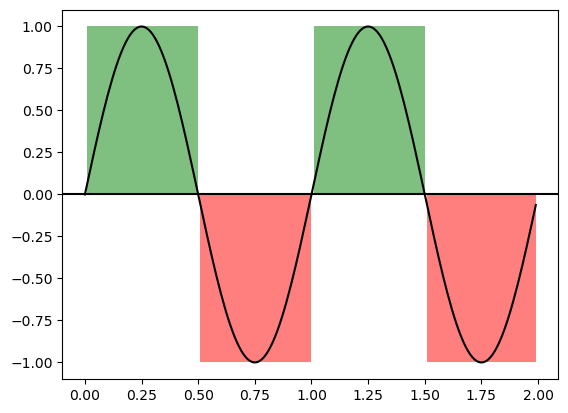

In [17]:
import numpy as np
import matplotlib.pyplot as plt


t = np.arange(0.0, 2, 0.01)
s = np.sin(2*np.pi*t)

fig, ax = plt.subplots()

ax.plot(t, s, color='black')
ax.axhline(0, color='black')

ax.fill_between(t, 1, where=s > 0, facecolor='green', alpha=.5)
ax.fill_between(t, -1, where=s < 0, facecolor='red', alpha=.5)

plt.show()

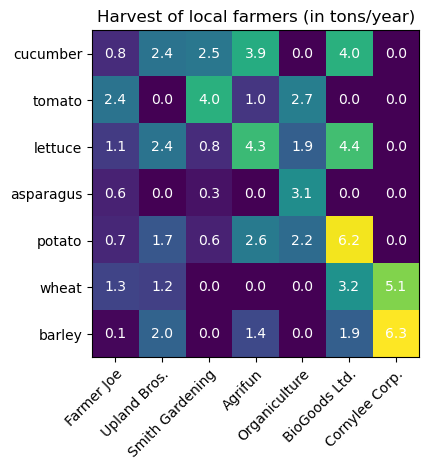

In [18]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
For Data Visualization we can vist following sites:
    https://matplotlib.org/stable/gallery/index
    https://seaborn.pydata.org/examples/index.html

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

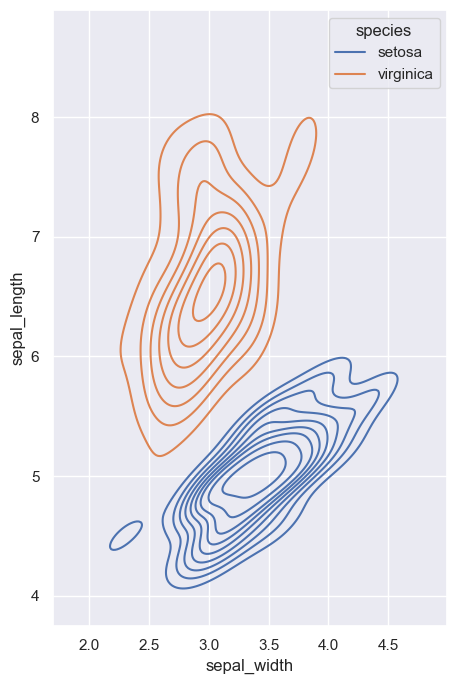

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
iris = sns.load_dataset("iris")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
)

In [20]:
# reading all the database employee table content on to a Pandas Dataframe
import pandas as pd
dataframe = pd.read_sql_query("SELECT * FROM employee", connection)
dataframe

,emp_id,emp_name,city,salary
0,1003,Subham,Mumbai,36000.0
1,1004,Dinesh,Chennai,30000.0
2,1005,Kakali,Mumbai,25000.0
3,1006,Bimal,Hyderabad,30000.0
4,1007,Tarun,Chennai,30000.0
5,1008,Rittik,Durgapur,45000.0
6,1009,Barun,Hyderabad,39000.0
7,1010,Utpal,Lucknow,20000.0
8,1011,Sujoy,Vododara,70000.0
9,1012,Sudeshna,Durgapur,78000.0
